In [1]:
import json

from pathlib import Path

import click
import pandas as pd
import torch
import torch.nn.functional as F

from torch.autograd import grad
from torch.optim import SGD
from torch.optim.lr_scheduler import StepLR
from tqdm.auto import tqdm

from src.experiments import log, load_model, save_data, initialize_sample_images


In [2]:
models = [
    load_model({
        "model_type": "ClassificationNet",
        "checkpoint": f"../models/mnist/epoch-{i}.ckpt"
    })
    for i in [8, 9]
]

D:\Programming\ML\training-data-retrieval\src\models\utils.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(str(checkpoint_path), map_location=map

In [3]:
@torch.no_grad()
def get_angles(model) -> list[torch.Tensor]:
    return [
        p / torch.norm(p, p=1)
        for p in model.parameters()
    ]


@torch.no_grad()
def get_norms(model) -> list[torch.Tensor]:
    return [
        torch.norm(p, p=2)
        for p in model.parameters()
    ]

In [4]:
angles = list(map(get_angles, models))

In [5]:
differences = [
    torch.norm(a - b)
    for a, b in zip(*angles)
]

(array([21.,  2.,  2.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
         1.,  1.,  1.,  1.,  1.,  0.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([0.0002631 , 0.00273228, 0.00520147, 0.00767065, 0.01013983,
        0.01260902, 0.0150782 , 0.01754739, 0.02001657, 0.02248576,
        0.02495494, 0.02742413, 0.02989331, 0.03236249, 0.03483168,
        0.03730086, 0.03977005, 0.04223923, 0.04470842, 0.0471776 ,
        0.04964678, 0.05211597, 0.05458516, 0.05705434, 0.05952352,
        0.06199271, 0.06446189, 0.06693107, 0.06940026, 0.07186944,
        0.07433862]),
 <BarContainer object of 30 artists>)

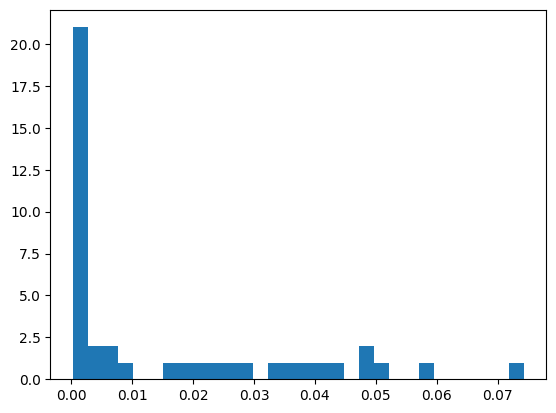

In [6]:
import matplotlib.pyplot as plt


plt.hist(differences, bins=30)

tensor(0.1802)

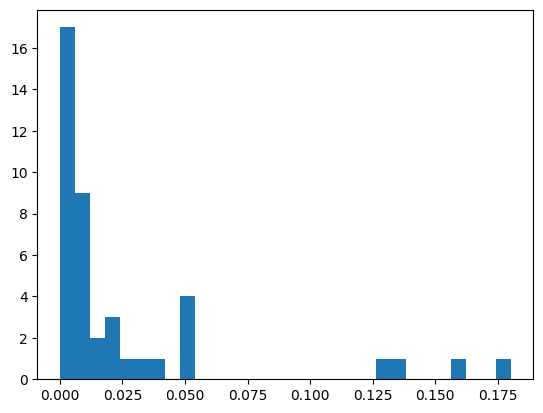

In [7]:
norms = list(map(get_norms, models))

plt.hist([abs(a - b) for a, b in zip(*norms)], bins=30)
max(abs(a - b) for a, b in zip(*norms))

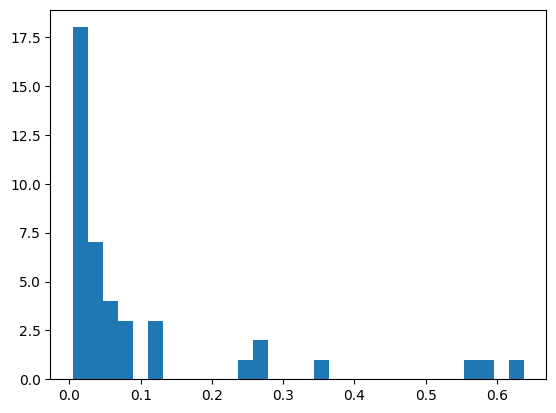

tensor(0.6379)

In [8]:
with torch.no_grad():
    differences = [
        torch.norm(a - b)
        for a, b in zip(models[0].parameters(), models[1].parameters())
    ]

plt.hist(differences, bins=30)
plt.show()
max(differences)